In [1]:
from pycocotools.coco import COCO
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pycocotools.mask as mask_util
from random import randint
from collections import defaultdict

In [2]:
CUSTOM_CLASSES = ['person', 'bicycle', 'cat', 'dog', 'backpack', 'umbrella', 'handbag', 'suitcase', 
                'sports ball', 'baseball bat', 'skateboard', 'tennis racket', 'bottle', 'wine glass', 
                'sandwich', 'chair', 'laptop', 'cell phone', 'book', 'clock', 'scissors', 'teddy bear',
                'torso', 'hand', 'foot', 'upleg', 'lowleg', 'uparm', 'lowarm', 'head']


In [3]:
coco_folder = '/mnt/DATASSD/DataSandbox/coco'
# dp_coco = COCO( coco_folder + '/annotations/custom_ann_train2014_v14.json')
dp_coco = COCO( coco_folder + '/annotations/custom_ann_non_human_train2014_v15.json')


loading annotations into memory...
Done (t=68.50s)
creating index...
index created!


In [4]:
catIds = dp_coco.getCatIds()
print(catIds)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [5]:
annIds = dp_coco.getAnnIds()

In [6]:
for catId in catIds:
    n_im_ids = dp_coco.getImgIds(catIds=catId)
    print(catId,  len(n_im_ids)) # CUSTOM_CLASSES[catId]

1 45174
2 2287
3 2818
4 3041
5 3924
6 2749
7 4861
8 1631
9 2986
10 1804
11 2511
12 2368
13 5968
14 1771
15 1645
16 8950
17 2475
18 3322
19 3734
20 3159
21 673
22 1510
23 0
24 0
25 0
26 0
27 0
28 0
29 0
30 0


In [7]:
n_im_ids = dp_coco.getImgIds(catIds=1)
print(len(n_im_ids))
# Select a random image id.
Selected_im = n_im_ids[randint(0, len(n_im_ids))]
im = dp_coco.loadImgs(Selected_im)[0]  
ann_ids = dp_coco.getAnnIds( imgIds=im['id'] )
anns = dp_coco.loadAnns(ann_ids)
im_name = os.path.join( coco_folder + '/train2014', im['file_name'] )

45174


216160 {'license': 1, 'file_name': 'COCO_train2014_000000216160.jpg', 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000216160.jpg', 'height': 500, 'width': 375, 'date_captured': '2013-11-18 16:29:52', 'flickr_url': 'http://farm3.staticflickr.com/2396/2131850468_1a1b4ea8b8_z.jpg', 'id': 216160} [12450, 2156421] /mnt/DATASSD/DataSandbox/coco/train2014/COCO_train2014_000000216160.jpg [{'segmentation': [[97.36, 265.27, 106.02, 251.11, 106.81, 237.73, 107.59, 236.94, 109.17, 229.07, 109.17, 222.77, 109.17, 216.48, 99.72, 199.95, 83.19, 190.5, 64.31, 183.42, 46.2, 173.98, 36.76, 178.7, 19.44, 188.93, 18.66, 191.29, 28.1, 198.37, 32.82, 219.62, 36.76, 224.35, 26.53, 225.92, 2.13, 226.71, 0.56, 228.28, 5.28, 251.89, 20.23, 237.73, 52.5, 249.53, 81.62, 263.7, 81.62, 263.7]], 'area': 5833.474199999999, 'image_id': 216160, 'id': 12450, 'category_id': 4, 'bbox': [0, 173, 108, 91], 'iscrowd': 0}, {'segmentation': [[192.72, 245.03, 226.9, 172.39, 211.52, 141.63, 220.92, 124.

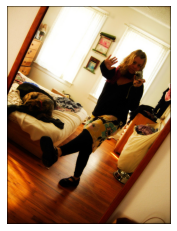

In [8]:
print( Selected_im, im, ann_ids, im_name, anns)
I=cv2.imread(im_name)
if I is not None:
    plt.imshow(I[:,:,::-1]); plt.axis('off'); plt.show()
else:
    print("No image to load")

In [21]:
bike_im_ids = dp_coco.getImgIds(catIds=22)
print(len(bike_im_ids))
# Select a random image id.
Selected_im = bike_im_ids[randint(0, len(bike_im_ids))]
im = dp_coco.loadImgs(Selected_im)[0]  
ann_ids = dp_coco.getAnnIds( imgIds=im['id'] )
anns = dp_coco.loadAnns(ann_ids)
cat_ids = dp_coco.getCatIds()
cats = dp_coco.loadCats(cat_ids)
im_name = os.path.join( coco_folder + '/train2014', im['file_name'] )

1510


566700 {'license': 4, 'file_name': 'COCO_train2014_000000566700.jpg', 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000566700.jpg', 'height': 412, 'width': 640, 'date_captured': '2013-11-24 15:15:24', 'flickr_url': 'http://farm5.staticflickr.com/4002/4425956654_0bb0def570_z.jpg', 'id': 566700} [1162249, 2147220, 2147298] /mnt/DATASSD/DataSandbox/coco/train2014/COCO_train2014_000000566700.jpg [{'segmentation': [[20.37, 308.31, 44.44, 312.93, 73.14, 300.9, 93.51, 290.71, 111.1, 295.34, 159.24, 305.53, 205.54, 301.82, 212.94, 264.79, 191.65, 244.42, 195.35, 217.57, 197.2, 183.32, 171.28, 157.39, 166.65, 125.91, 169.43, 87.96, 162.02, 74.07, 124.06, 60.18, 82.4, 61.11, 40.74, 74.99, 28.7, 83.33, 29.63, 99.99, 22.22, 132.4, 39.81, 161.1, 8.33, 181.47, 7.41, 220.35, 40.74, 244.42, 22.22, 270.35, 12.04, 305.53]], 'area': 38485.106749999984, 'image_id': 566700, 'id': 1162249, 'category_id': 22, 'bbox': [7, 60, 205, 252], 'iscrowd': 0}, {'segmentation': [[376.56, 265.59

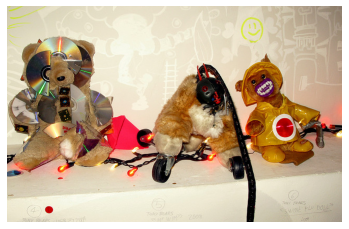

In [22]:
print( Selected_im, im, ann_ids, im_name, anns, cats)

I=cv2.imread(im_name)
if I is not None:
    plt.imshow(I[:,:,::-1]); plt.axis('off'); plt.show()
else:
    print("No image to load")